The previous two notebooks collated a collection of bibliometric records for analysis, 
followed by an initial filtering to constrain the number of publications as much as possible.

In this notebook we constrain the number of publications as much as possible based on identification of relevant topics and study areas

In [1]:
%run "Common Setup.ipynb"

C:\Users\douglasd\AppData\Local\Continuum\miniconda3\envs\biblio\lib\site-packages\fuzzywuzzy-0.17.0-py3.6.egg\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
filtered_rc = wosis.load_query_results('{}/initial_filtered_corpora.txt'.format(TMP_DIR))
num_records = []

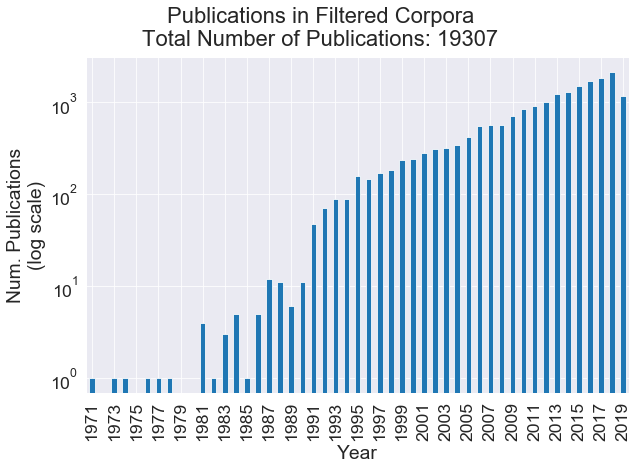

In [3]:
wos_plot.plot_pub_trend(filtered_rc, title='Publications in Filtered Corpora', 
                        save_plot_fn='{}/filtered_pub_trend'.format(FIG_DIR))

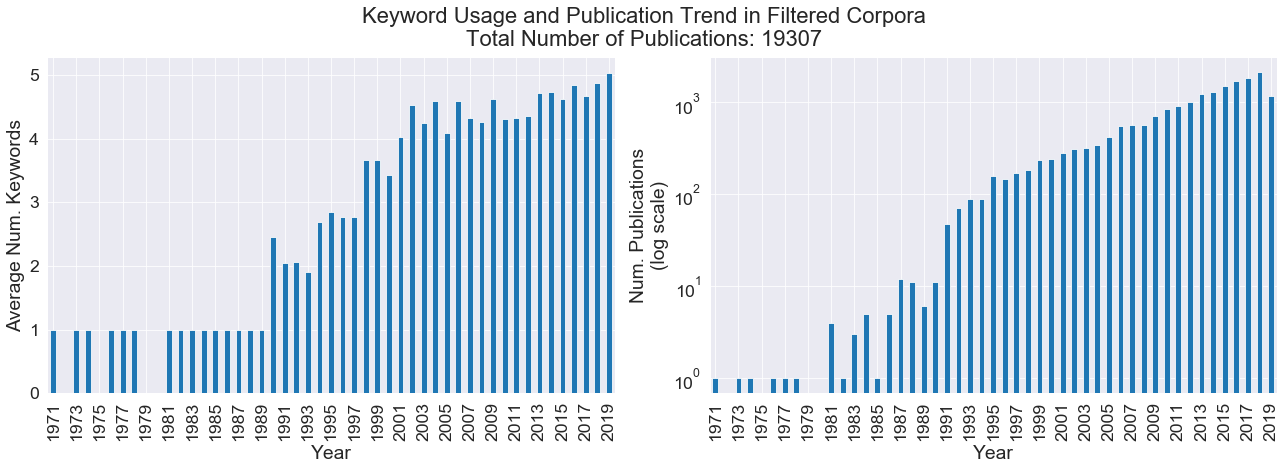

In [4]:
wos_plot.plot_kw_trend(filtered_rc, title='Keyword Usage and Publication Trend in Filtered Corpora', 
                       save_plot_fn='{}/num_kw_per_filtered_pub'.format(FIG_DIR))

In [5]:
filtered_df = wosis.rc_to_df(filtered_rc)

earliest_year = min(filtered_df.year)
latest_year = max(filtered_df.year)

early_papers = filtered_df.loc[filtered_df['year'] == earliest_year, :]

link_to_early_papers = wosis.link_to_pub(early_papers)
link_to_early_papers.loc[:, ~link_to_early_papers.columns.isin(hide_columns)]

,year,title,copyright,AU,SO,DOI link
18215,1971,MAP SCALE EFFECT IN STUDY OF STREAM MORPHOLOGY,,"YANG, CT|STALL, JB",WATER RESOURCES RESEARCH,https://dx.doi.org/10.1029/WR007i003p00709


In [6]:
pubs_in_first_year = filtered_df.groupby('year').count()['title'][min(filtered_df.year)]
pubs_in_last_year = filtered_df.groupby('year').count()['title'][max(filtered_df.year)]

print("Publications in {}:".format(earliest_year), pubs_in_first_year)
print("Publications in {}:".format(latest_year), pubs_in_last_year)

Publications in 1971: 1
Publications in 2019: 1185


<hr>

In [7]:
cited_scaling = wosis.get_num_citations(filtered_rc, WOS_CONFIG, 
                                               cache_as='{}/scaling_citations.csv'.format(TMP_DIR))

cited_scaling.head(10)['title'].tolist()

['The Brazilian Atlantic Forest: How much is left, and how is the remaining forest distributed? Implications for conservation',
 'A CRITICAL-REVIEW OF DATA ON FIELD-SCALE DISPERSION IN AQUIFERS',
 'A multiscale finite element method for elliptic problems in composite materials and porous media',
 'Hydrologic implications of dynamical and statistical approaches to downscaling climate model outputs',
 'Generating surfaces of daily meteorological variables over large regions of complex terrain',
 'A survey and overview of habitat fragmentation experiments',
 'Habitat loss and extinction in the hotspots of biodiversity',
 'Estimating corn leaf chlorophyll concentration from leaf and canopy reflectance',
 'SCALE ISSUES IN HYDROLOGICAL MODELING - A REVIEW',
 'Statistics of extremes in hydrology']

In [8]:
cited_scaling = wosis.calc_average_citations(cited_scaling, max_year=2019, sort=True)

make_safe_display(cited_scaling.head(10))

,year,title,copyright,AU,SO,citations,Avg. Citations
20,2016,Deep Convolutional Neural Networks for Compute...,NaN,"Shin, Hoo-Chang|Roth, Holger R.|Gao, Mingchen|...",IEEE TRANSACTIONS ON MEDICAL IMAGING,569,142.25
0,2009,The Brazilian Atlantic Forest: How much is lef...,Elsevier Ltd. All rights reserved.,"Ribeiro, Milton Cezar|Metzger, Jean Paul|Marte...",BIOLOGICAL CONSERVATION,1413,128.45
25,2013,Uncertainty in simulating wheat yields under c...,NaN,"Asseng, S.|Ewert, F.|Rosenzweig, C.|Jones, J. ...",NATURE CLIMATE CHANGE,497,71.00
22,2011,RCP4.5: a pathway for stabilization of radiati...,NaN,"Thomson, Allison M.|Calvin, Katherine V.|Smith...",CLIMATIC CHANGE,531,59.00
32,2012,Bias correction of regional climate model simu...,(C) 2012 Elsevier B.V. All rights reserved.,"Teutschbein, Claudia|Seibert, Jan",JOURNAL OF HYDROLOGY,445,55.62
50,2013,"Seawater intrusion processes, investigation an...",Elsevier Ltd. All rights reserved.,"Werner, Adrian D.|Bakker, Mark|Post, Vincent E...",ADVANCES IN WATER RESOURCES,376,53.71
27,2011,Global patterns of land-atmosphere fluxes of c...,NaN,"Jung, Martin|Reichstein, Markus|Margolis, Hank...",JOURNAL OF GEOPHYSICAL RESEARCH-BIOGEOSCIENCES,477,53.00
3,2004,Hydrologic implications of dynamical and stati...,NaN,"Wood, AW|Leung, LR|Sridhar, |Lettenmaier, DP",CLIMATIC CHANGE,844,52.75
13,2006,On the variability of respiration in terrestri...,NaN,"Davidson, EA|Janssens, IA|Luo, YQ",GLOBAL CHANGE BIOLOGY,684,48.86
18,2008,A review of land-use regression models to asse...,Elsevier Ltd. All rights reserved.,"Hoek, Gerard|Beelen, Rob|de Hoogh, Kees|Vienne...",ATMOSPHERIC ENVIRONMENT,579,48.25


In [9]:
early_stage = filtered_rc.yearSplit(1971, 1999)
mid_stage = filtered_rc.yearSplit(2000, 2009)
late_stage = filtered_rc.yearSplit(2010, 2019)

cited_early_stage = wosis.get_num_citations(early_stage, WOS_CONFIG, 
                                            cache_as='{}/earlystage_scale_citations.csv'.format(TMP_DIR))

cited_mid_stage = wosis.get_num_citations(mid_stage, WOS_CONFIG, 
                                          cache_as='{}/midstage_scale_citations.csv'.format(TMP_DIR))

cited_late_stage = wosis.get_num_citations(late_stage, WOS_CONFIG, 
                                          cache_as='{}/latestage_scale_citations.csv'.format(TMP_DIR))

In [10]:
cited_early_stage = wosis.calc_average_citations(cited_early_stage, max_year=2018, sort=True)
linked_cited_early_stage = wosis.link_to_pub(cited_early_stage.head(10))

make_safe_display(linked_cited_early_stage)

,year,title,copyright,AU,SO,citations,Avg. Citations,DOI link
1,1997,A multiscale finite element method for ellipti...,(C) 1997 Academic Press.,"Hou, TY|Wu, XH",JOURNAL OF COMPUTATIONAL PHYSICS,900,40.91,https://dx.doi.org/10.1006/jcph.1997.5682
2,1997,Generating surfaces of daily meteorological va...,(C) 1997 Elsevier Science B.V.,"Thornton, PE|Running, SW|White, MA",JOURNAL OF HYDROLOGY,809,36.77,https://dx.doi.org/10.1016/S0022-1694(96)03128-9
0,1992,A CRITICAL-REVIEW OF DATA ON FIELD-SCALE DISPE...,NaN,"GELHAR, LW|WELTY, C|REHFELDT, KR",WATER RESOURCES RESEARCH,977,36.19,https://dx.doi.org/10.1029/92WR00607
5,1999,Persistent organic pollutants (POPs): state of...,(C) 1999 Elsevier Science Ltd. All rights res...,"Jones, KC|de Voogt, P",ENVIRONMENTAL POLLUTION,719,35.95,https://dx.doi.org/10.1016/S0269-7491(99)00098-6
3,1995,SCALE ISSUES IN HYDROLOGICAL MODELING - A REVIEW,NaN,"BLOSCHL, G|SIVAPALAN, M",HYDROLOGICAL PROCESSES,769,32.04,https://dx.doi.org/10.1002/hyp.3360090305
6,1997,A continental phenology model for monitoring v...,NaN,"White, MA|Thornton, PE|Running, SW",GLOBAL BIOGEOCHEMICAL CYCLES,607,27.59,https://dx.doi.org/10.1029/97GB00330
4,1992,EXTREME EVENTS IN A CHANGING CLIMATE - VARIABI...,NaN,"KATZ, RW|BROWN, BG",CLIMATIC CHANGE,727,26.93,https://dx.doi.org/10.1007/BF00139728
8,1998,Statistical downscaling of general circulation...,NaN,"Wilby, RL|Wigley, TML|Conway, D|Jones, PD|Hewi...",WATER RESOURCES RESEARCH,472,22.48,https://dx.doi.org/10.1029/98WR02577
10,1999,Global patterns of terrestrial biological nitr...,NaN,"Cleveland, CC|Townsend, AR|Schimel, DS|Fisher,...",GLOBAL BIOGEOCHEMICAL CYCLES,443,22.15,https://dx.doi.org/10.1029/1999GB900014
11,1999,Observed spatial organization of soil moisture...,NaN,"Western, AW|Grayson, RB|Bloschl, G|Willgoose, ...",WATER RESOURCES RESEARCH,441,22.05,https://dx.doi.org/10.1029/1998WR900065


In [11]:
cited_mid_stage = wosis.calc_average_citations(cited_mid_stage, max_year=2018, sort=True)
linked_cited_mid_stage = wosis.link_to_pub(cited_mid_stage.head(10))

make_safe_display(linked_cited_mid_stage)

,year,title,copyright,AU,SO,citations,Avg. Citations,DOI link
0,2009,The Brazilian Atlantic Forest: How much is lef...,Elsevier Ltd. All rights reserved.,"Ribeiro, Milton Cezar|Metzger, Jean Paul|Marte...",BIOLOGICAL CONSERVATION,1413,141.30,https://dx.doi.org/10.1016/j.biocon.2009.02.021
1,2004,Hydrologic implications of dynamical and stati...,NaN,"Wood, AW|Leung, LR|Sridhar, |Lettenmaier, DP",CLIMATIC CHANGE,844,56.27,https://dx.doi.org/10.1023/B:CLIM.0000013685.9...
11,2008,A review of land-use regression models to asse...,Elsevier Ltd. All rights reserved.,"Hoek, Gerard|Beelen, Rob|de Hoogh, Kees|Vienne...",ATMOSPHERIC ENVIRONMENT,579,52.64,https://dx.doi.org/10.1016/j.atmosenv.2008.05.057
7,2006,On the variability of respiration in terrestri...,NaN,"Davidson, EA|Janssens, IA|Luo, YQ",GLOBAL CHANGE BIOLOGY,684,52.62,https://dx.doi.org/10.1111/j.1365-2486.2005.01...
12,2007,Evaluating the performance and utility of regi...,NaN,"Christensen, Jens H.|Carter, Timothy R.|Rummuk...",CLIMATIC CHANGE,572,47.67,https://dx.doi.org/10.1007/s10584-006-9211-6
3,2002,Habitat loss and extinction in the hotspots of...,NaN,"Brooks, TM|Mittermeier, RA|Mittermeier, CG|da ...",CONSERVATION BIOLOGY,808,47.53,https://dx.doi.org/10.1046/j.1523-1739.2002.00...
8,2005,SWAT2000: current capabilities and research op...,"Copyright (C) 2005 John Wiley Sons, Ltd.","Arnold, JG|Fohrer, N",HYDROLOGICAL PROCESSES,644,46.00,https://dx.doi.org/10.1002/hyp.5611
5,2002,Statistics of extremes in hydrology,(C) 2002 Elsevier Science Ltd. All rights res...,"Katz, RW|Parlange, MB|Naveau, P",ADVANCES IN WATER RESOURCES,744,43.76,https://dx.doi.org/10.1016/S0309-1708(02)00056-8
9,2005,"Distributed generation: definition, benefits a...",Elsevier Ltd. All rights reserved.,"Pepermans, G|Driesen, J|Haeseldonckx, D|Belman...",ENERGY POLICY,609,43.50,https://dx.doi.org/10.1016/j.enpol.2003.10.004
2,2000,A survey and overview of habitat fragmentation...,NaN,"Debinski, DM|Holt, RD",CONSERVATION BIOLOGY,809,42.58,https://dx.doi.org/10.1046/j.1523-1739.2000.98...


In [12]:
cited_late_stage = wosis.calc_average_citations(cited_late_stage, max_year=2019, sort=True)
linked_cited_late_stage = wosis.link_to_pub(cited_late_stage.head(10))

make_safe_display(linked_cited_late_stage)

,year,title,copyright,AU,SO,citations,Avg. Citations,DOI link
0,2016,Deep Convolutional Neural Networks for Compute...,NaN,"Shin, Hoo-Chang|Roth, Holger R.|Gao, Mingchen|...",IEEE TRANSACTIONS ON MEDICAL IMAGING,569,142.25,https://dx.doi.org/10.1109/TMI.2016.2528162
2,2013,Uncertainty in simulating wheat yields under c...,NaN,"Asseng, S.|Ewert, F.|Rosenzweig, C.|Jones, J. ...",NATURE CLIMATE CHANGE,497,71.00,https://dx.doi.org/10.1038/NCLIMATE1916
1,2011,RCP4.5: a pathway for stabilization of radiati...,NaN,"Thomson, Allison M.|Calvin, Katherine V.|Smith...",CLIMATIC CHANGE,531,59.00,https://dx.doi.org/10.1007/s10584-011-0151-4
4,2012,Bias correction of regional climate model simu...,(C) 2012 Elsevier B.V. All rights reserved.,"Teutschbein, Claudia|Seibert, Jan",JOURNAL OF HYDROLOGY,445,55.62,https://dx.doi.org/10.1016/j.jhydrol.2012.05.052
5,2013,"Seawater intrusion processes, investigation an...",Elsevier Ltd. All rights reserved.,"Werner, Adrian D.|Bakker, Mark|Post, Vincent E...",ADVANCES IN WATER RESOURCES,376,53.71,https://dx.doi.org/10.1016/j.advwatres.2012.03...
3,2011,Global patterns of land-atmosphere fluxes of c...,NaN,"Jung, Martin|Reichstein, Markus|Margolis, Hank...",JOURNAL OF GEOPHYSICAL RESEARCH-BIOGEOSCIENCES,477,53.00,https://dx.doi.org/10.1029/2010JG001566
9,2013,Methane emissions from wetlands: biogeochemica...,NaN,"Bridgham, Scott D.|Cadillo-Quiroz, Hinsby|Kell...",GLOBAL CHANGE BIOLOGY,316,45.14,https://dx.doi.org/10.1111/gcb.12131
7,2012,A review of large area monitoring of land cove...,(C) 2012 Elsevier Inc. All rights reserved.,"Hansen, Matthew C.|Loveland, Thomas R.",REMOTE SENSING OF ENVIRONMENT,343,42.88,https://dx.doi.org/10.1016/j.rse.2011.08.024
33,2015,Effects of climate extremes on the terrestrial...,NaN,"Frank, Dorothea|Reichstein, Markus|Bahn, Micha...",GLOBAL CHANGE BIOLOGY,198,39.60,https://dx.doi.org/10.1111/gcb.12916
13,2013,Macropores and water flow in soils revisited,NaN,"Beven, Keith|Germann, Peter",WATER RESOURCES RESEARCH,272,38.86,https://dx.doi.org/10.1002/wrcr.20156


<hr>

In [13]:
early_phrases = wosis.find_phrases(cited_early_stage.head(10))
early_phrases_df = early_phrases.all_phrases.to_csv("{}/{}_early_scale_phrases.csv".format(DATA_DIR, TODAY))

In [14]:
mid_phrases = wosis.find_phrases(cited_mid_stage.head(10))
mid_phrases.all_phrases.to_csv("{}/{}_mid_scale_phrases.csv".format(DATA_DIR, TODAY))

In [15]:
late_phrases = wosis.find_phrases(cited_late_stage.head(10))
late_phrases.all_phrases.to_csv("{}/{}_late_scale_phrases.csv".format(DATA_DIR, TODAY))

<hr>

Searching the corpora for journals related to social issues

In [16]:
journal_list = ["SOCIETY AND NATURAL RESOURCES", "WATER POLICY", "ECOLOGY AND SOCIETY", 
                                        "JOURNAL OF ENVIRONMENTAL PLANNING AND MANAGEMENT", 
                                        "AUSTRALASIAN JOURNAL OF ENVIRONMENTAL MANAGEMENT"]

In [17]:
journal_list

['SOCIETY AND NATURAL RESOURCES',
 'WATER POLICY',
 'ECOLOGY AND SOCIETY',
 'JOURNAL OF ENVIRONMENTAL PLANNING AND MANAGEMENT',
 'AUSTRALASIAN JOURNAL OF ENVIRONMENTAL MANAGEMENT']

In [18]:
wosis.find_pubs_by_journal(filtered_rc, journal_list)

{'initial_filtered_corpora_WATER POLICY': <metaknowledge.RecordCollection object initial_filtered_corpora_WATER POLICY>}

<hr>

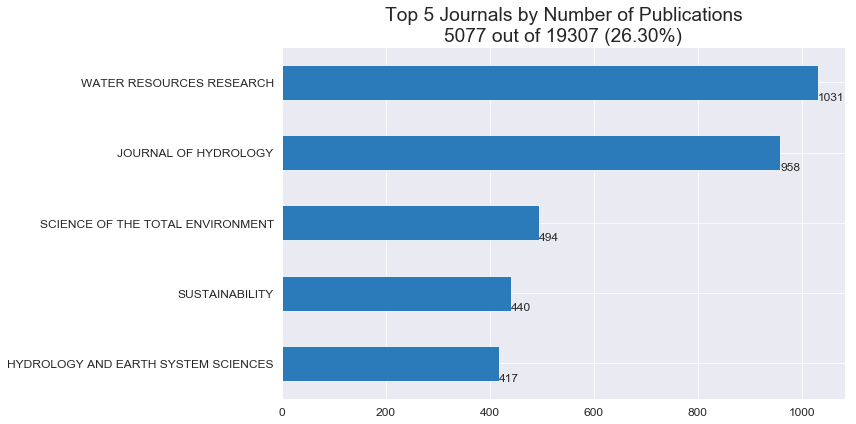

In [19]:
wos_plot.plot_pubs_per_journal(filtered_rc, top_n=5, annotate=True, show_stats=True, 
                               save_plot_fn='{}/filtered_top5_journal_pubs'.format(FIG_DIR))

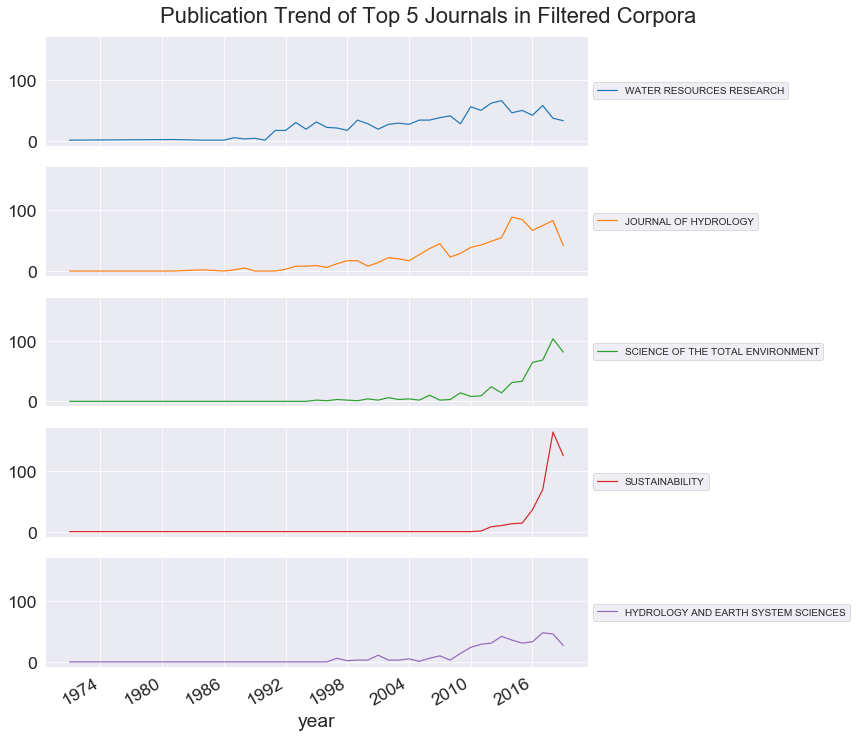

In [20]:
wos_plot.plot_journal_pub_trend(filtered_rc, top_n=5, title='Publication Trend of Top 5 Journals in Filtered Corpora',
                                save_plot_fn='{}/filtered_top5_journal_trends'.format(FIG_DIR))